#Air Pollution Dataset

**Problem Statement:**

The goal of this analysis is to derive insights into air pollution trends, assess the impact of pollutants on AQI, and identify areas for intervention to improve air quality.

**Objective :**

The objective of this EDA project is to analyze and interpret air quality data across different cities and time periods to uncover trends, patterns, and insights. Specifically, the project aims to:

Understand Pollution Levels: Identify key pollutants and their contribution to air quality degradation.
City-Wise Comparison: Compare air quality indices and pollutant levels across cities to determine the most and least polluted regions.
Temporal Patterns: Explore temporal trends (daily, monthly, or yearly) in pollution levels and AQI to identify seasonal effects or long-term trends.
Data Completeness and Quality: Investigate missing data, outliers, and inconsistencies, and apply suitable imputation or cleaning methods.
Insights for Policy: Generate actionable insights to assist policymakers and stakeholders in implementing effective air quality management strategies.


**Description of the Dataset:**

The city_day.csv dataset likely contains daily air quality measurements for various cities over a period of time. Based on its name and the problem statement, it's reasonable to assume that the data includes information about:

City: The name of the city where the measurements were taken.

Date: The date of the measurement.

Pollutants: Concentrations of different air pollutants such as PM2.5, PM10, NO2, SO2, CO, and O3.

AQI: The calculated Air Quality Index (AQI) for the day.

Other relevant information: The dataset may also include other potentially relevant data like temperature, wind speed, and humidity, which can influence air quality.

#**Loading and Understanding the dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
data.shape

(29531, 16)

In [ ]:
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [ ]:
data.tail(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29521,Visakhapatnam,2020-06-22,33.17,108.22,5.58,42.45,27.06,13.70,0.73,13.65,34.85,3.99,10.24,2.32,95.0,Satisfactory
29522,Visakhapatnam,2020-06-23,25.40,83.38,2.76,34.09,19.92,13.13,0.54,10.40,43.27,2.88,12.03,1.33,100.0,Satisfactory
29523,Visakhapatnam,2020-06-24,34.36,90.90,1.22,23.38,13.12,14.45,0.56,10.92,35.12,2.99,3.15,1.60,86.0,Satisfactory
29524,Visakhapatnam,2020-06-25,13.45,58.54,2.30,21.60,13.09,12.27,0.41,8.19,29.38,1.28,5.64,0.92,77.0,Satisfactory
29525,Visakhapatnam,2020-06-26,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0,Good
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [ ]:
data.shape[0]

29531

In [ ]:
data.shape[1]

16

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


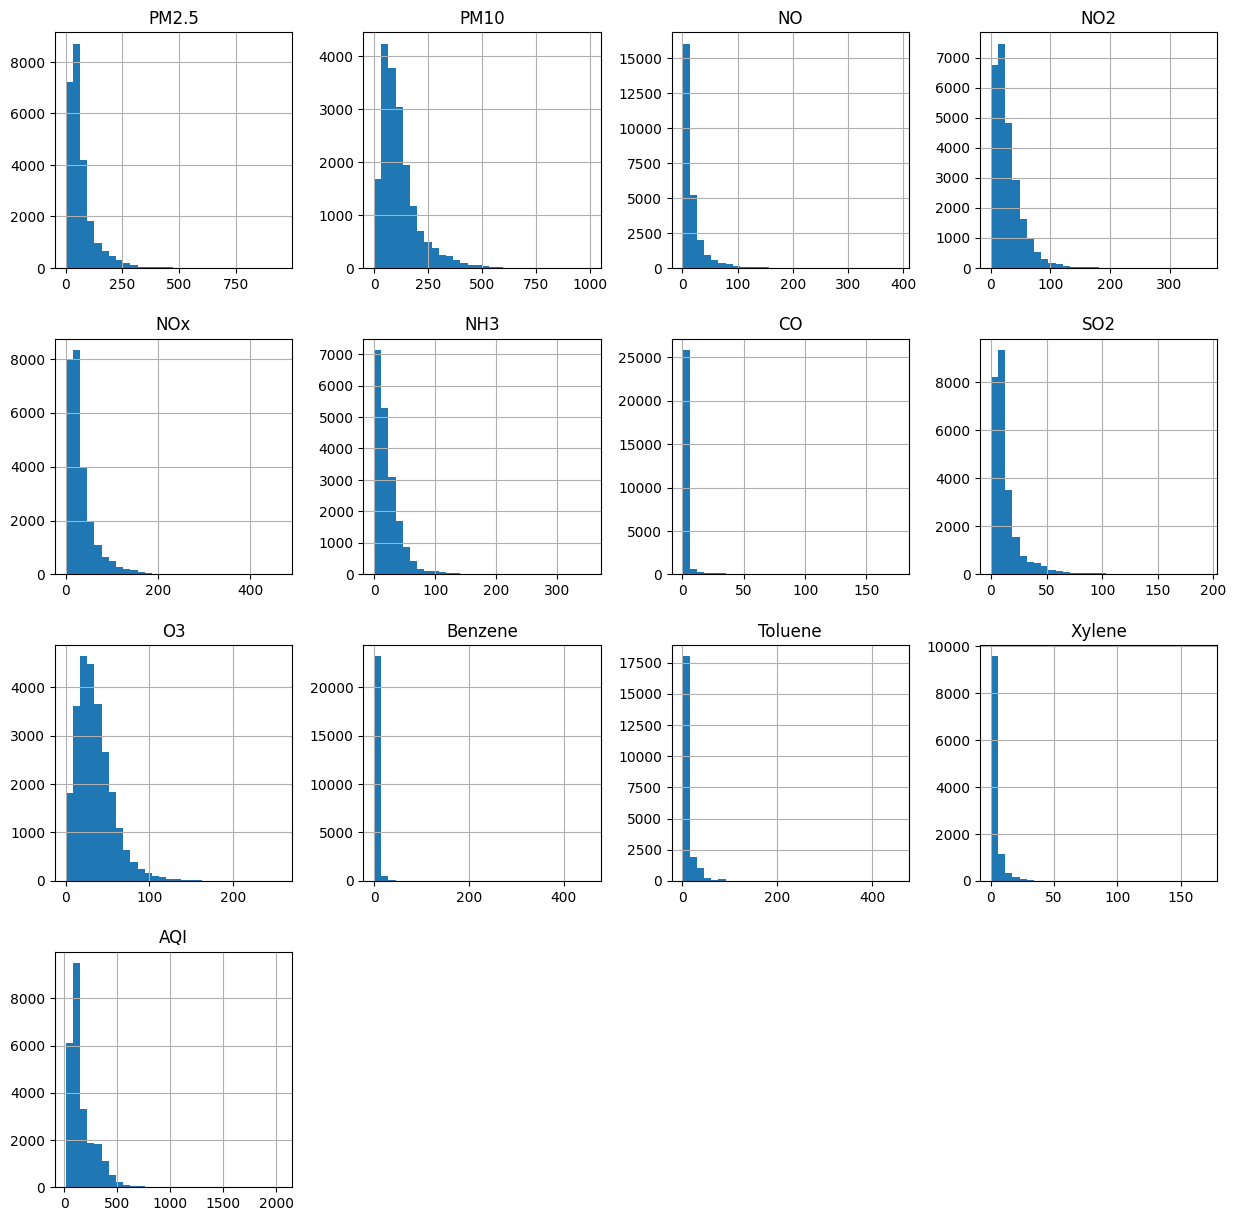

In [ ]:
data.hist(figsize=(15,15),bins=30)
plt.show()

In [ ]:
data['City'].value_counts()

,count
City,
Ahmedabad,2009
Bengaluru,2009
Chennai,2009
Mumbai,2009
Lucknow,2009
Delhi,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [ ]:
data['AQI_Bucket'].value_counts()

,count
AQI_Bucket,
Moderate,8829
Satisfactory,8224
Poor,2781
Very Poor,2337
Good,1341
Severe,1338


#**Data Cleaning**

##Converting to correct format

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

#breaking date into day, month and year
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

data.drop('Date', axis = 1, inplace = True)

data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,day,month,year
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,1,1,2015
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2,1,2015
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,3,1,2015
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,4,1,2015
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,27,6,2020
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,28,6,2020
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,29,6,2020
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,30,6,2020


##Null values correction

In [ ]:
missing = data.isnull().sum()
missing

,0
City,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854
O3,4022


In [ ]:
data.drop('Xylene', axis = 1, inplace = True)  #many null values
data.drop('AQI_Bucket', axis = 1, inplace = True) #not needed

In [ ]:
#filling the null values with median as every one is skewed
data['AQI'] = data['AQI'].fillna(data['AQI'].median())
data['Benzene'] = data['Benzene'].fillna(data['Benzene'].median())
data['CO'] = data['CO'].fillna(data['CO'].median())
data['NH3'] = data['NH3'].fillna(data['NH3'].median())
data['NO'] = data['NO'].fillna(data['NO'].median())
data['NO2'] = data['NO2'].fillna(data['NO2'].median())
data['NOx'] = data['NOx'].fillna(data['NOx'].median())
data['O3'] = data['O3'].fillna(data['O3'].median())
data['PM2.5'] = data['PM2.5'].fillna(data['PM2.5'].median())
data['PM10'] = data['PM10'].fillna(data['PM10'].median())
data['SO2']=data['SO2'].fillna(data['SO2'].median())
data['Toluene'] = data['Toluene'].fillna(data['Toluene'].median())

In [ ]:
data.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


In [ ]:
data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1,1,2015
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,3,1,2015
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020


##Duplcated values

In [ ]:
data.duplicated().sum()

np.int64(0)

##Catrgorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
data['City'] = LabelEncoder().fit_transform(data['City'])
data

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
0,0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,1,1,2015
1,0,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2,1,2015
2,0,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,3,1,2015
3,0,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,4,1,2015
4,0,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,5,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,27,6,2020
29527,25,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,28,6,2020
29528,25,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,29,6,2020
29529,25,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,30,6,2020


#Correlation Analysis

In [ ]:
corr_mat = data.corr()
corr_mat

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,day,month,year
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.121778,0.000181,0.018314,0.032550
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.633654,-0.009835,0.041722,-0.170771
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.447686,-0.019463,-0.012204,-0.067119
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.438039,-0.003483,0.026233,0.009100
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.531952,-0.006954,0.033157,-0.041194
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.436282,-0.006290,0.022637,-0.003627
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,0.097916,0.001734,0.013439,-0.116269
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.650475,0.001251,-0.001473,-0.057421
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.454182,-0.002498,-0.025747,0.059695
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.199100,-0.003337,-0.081535,-0.005868


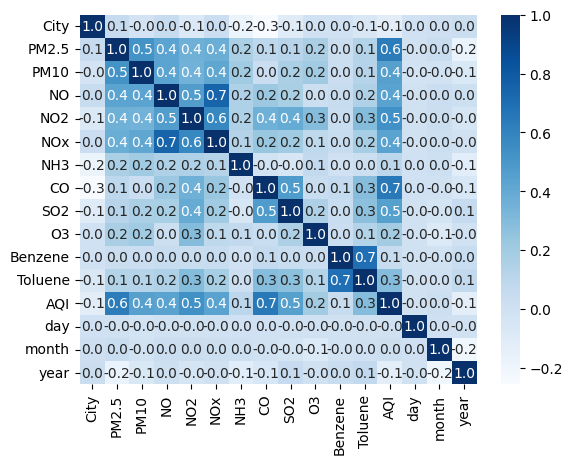

In [ ]:
sns.heatmap(corr_mat, annot = True, cmap = "Blues", fmt = '.1f')
plt.show()

In [ ]:
AQI_corr = data.corr()['AQI'].sort_values(ascending = True)
AQI_corr

,AQI
year,-0.129244
City,-0.121778
day,-0.004507
month,0.021516
Benzene,0.052027
NH3,0.097916
O3,0.199100
Toluene,0.288749
NOx,0.436282
NO,0.438039


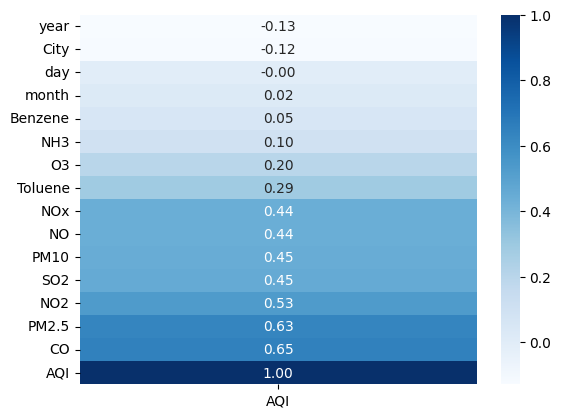

In [ ]:

sns.heatmap(AQI_corr.to_frame(), annot = True, fmt = '.2f', cmap = "Blues")
plt.show()

Taking only neccessary features which are highly correlated with AQI and dropping others.



In [ ]:
data.drop(columns = ['year', 'City', 'day', 'month', 'Benzene', 'NH3', 'O3', 'Toluene'], axis = 1, inplace = True)  #less correlated with AQI
data.drop(columns = ['NO', 'NO2'], axis = 1, inplace = True)  #highly correlated with NOx, so we take only NOx

In [ ]:
data

,PM2.5,PM10,NOx,CO,SO2,AQI
0,48.57,95.68,17.15,0.92,27.64,118.0
1,48.57,95.68,16.46,0.97,24.55,118.0
2,48.57,95.68,29.70,17.40,29.07,118.0
3,48.57,95.68,17.97,1.70,18.59,118.0
4,48.57,95.68,37.76,22.10,39.33,118.0
...,...,...,...,...,...,...
29526,15.02,50.94,19.54,0.47,8.55,41.0
29527,24.38,74.09,16.53,0.52,12.72,70.0
29528,22.91,65.73,18.33,0.48,8.42,68.0
29529,16.64,49.97,18.80,0.52,9.84,54.0


#Checking Skewness

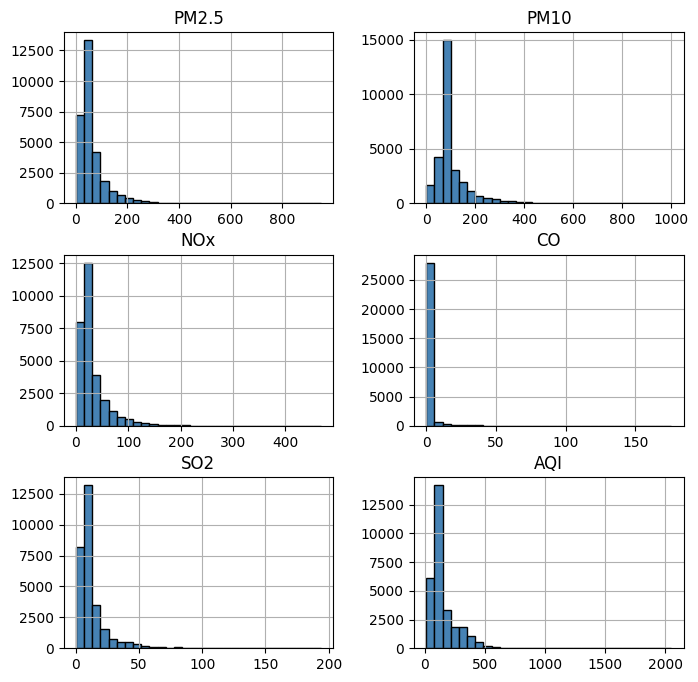

In [ ]:
data.hist(bins = 30, color = 'steelblue', figsize=(8,8), edgecolor = 'k')
plt.show()

##Converting to log

In [ ]:
data['PM2.5'] = np.log1p(data['PM2.5'])
data['PM10'] = np.log1p(data['PM10'])
data['CO'] = np.log1p(data['CO'])
data['NOx'] = np.log1p(data['NOx'])
data['SO2'] = np.log1p(data['SO2'])

In [ ]:
data['AQI'] = np.log1p(data['AQI'])

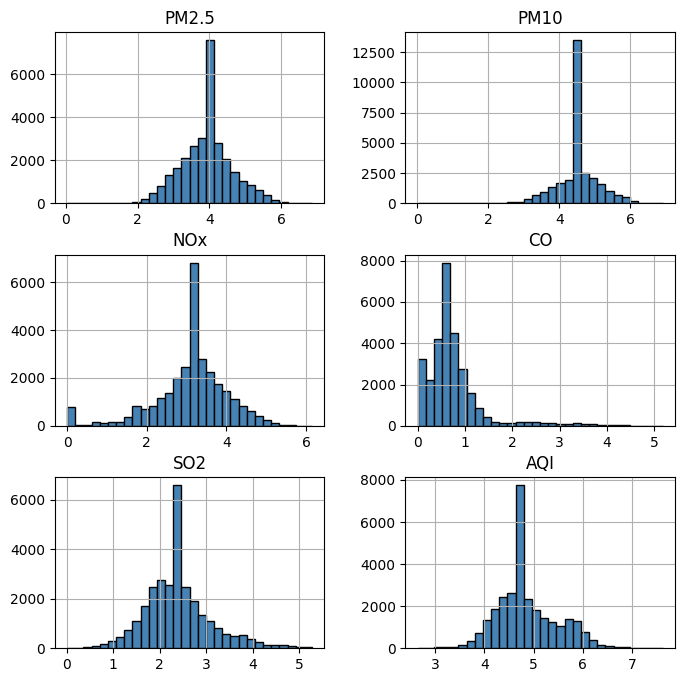

In [ ]:
data.hist(bins = 30, color = 'steelblue', figsize=(8,8), edgecolor = 'k')
plt.show()

In [ ]:
data.shape

(29531, 6)

#Outlier Detection

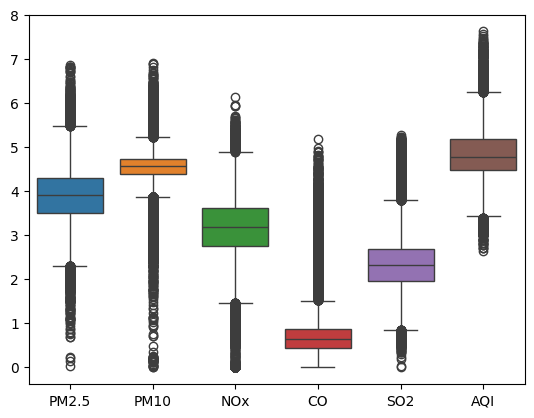

In [ ]:
sns.boxplot(data)
plt.show()

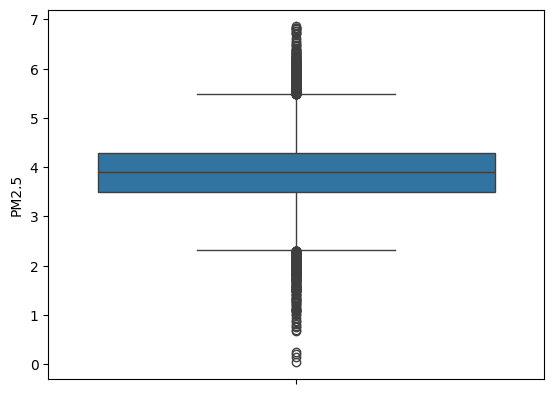

number of outliers in PM2.5 =  155


In [ ]:
#PM2.5
from scipy import stats
sns.boxplot(data['PM2.5'])
plt.show()

zsco1 = np.abs(stats.zscore(data['PM2.5']))
outl1 = data[zsco1 > 3]
print('number of outliers in PM2.5 = ', outl1.shape[0])

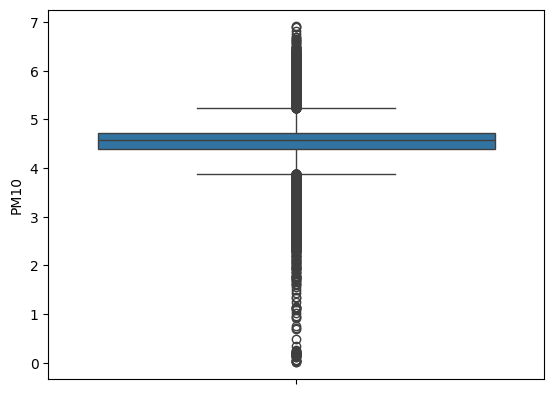

number of outliers in PM10 =  274


In [ ]:
sns.boxplot(data['PM10'])
plt.show()

zsco2 = np.abs(stats.zscore(data['PM10']))
outl2 = data[zsco2 > 3]
print('number of outliers in PM10 = ', outl2.shape[0])

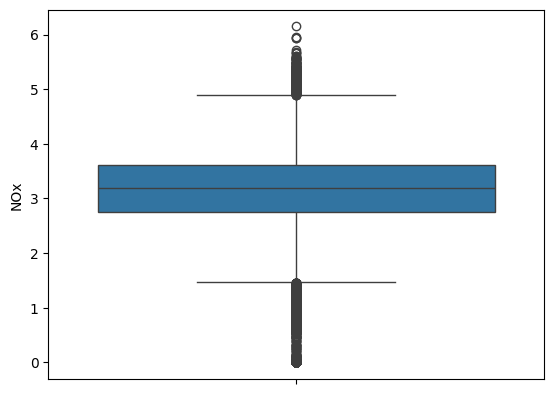

number of outliers in NOx =  791


In [ ]:
sns.boxplot(data['NOx'])
plt.show()

zsco3 = np.abs(stats.zscore(data['NOx']))
outl3 = data[zsco3 > 3]
print('number of outliers in NOx = ', outl3.shape[0])

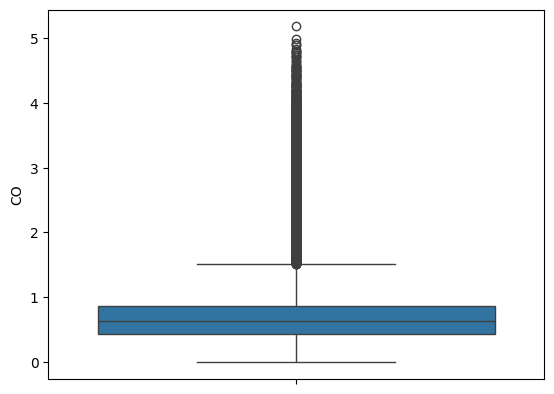

number of outliers in CO =  904


In [ ]:
sns.boxplot(data['CO'])
plt.show()

zsco4 = np.abs(stats.zscore(data['CO']))
outl4 = data[zsco4 > 3]
print('number of outliers in CO = ', outl4.shape[0])

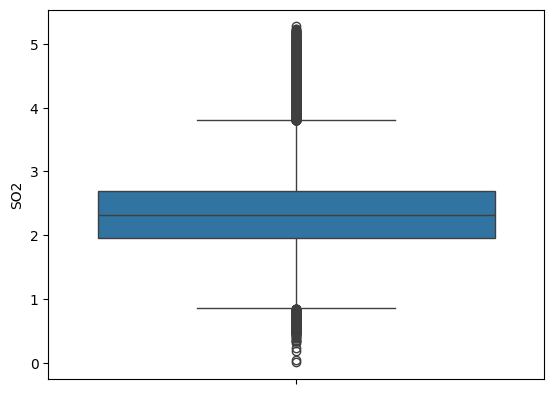

number of outliers in SO2 =  365


In [ ]:
sns.boxplot(data['SO2'])
plt.show()

zsco5 = np.abs(stats.zscore(data['SO2']))
outl5 = data[zsco5 > 3]
print('number of outliers in SO2 = ', outl5.shape[0])

In [ ]:
#remove ouliers
def remove_outliers(Data, excluded):
  for col in Data.columns:
    if col == excluded:
      continue

    Q1 = Data[col].quantile(0.25)
    Q3 = Data[col].quantile(0.75)

    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    Data = Data[(Data[col] >= lower) & (Data[col] <= upper)]
  return Data

data_cleaned = remove_outliers(data, 'AQI')
data_cleaned

,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
34,4.402442,4.571407,3.218876,1.214913,3.285787,5.686975
...,...,...,...,...,...,...
29526,2.773838,3.950089,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,2.985682,0.418710,2.383243,4.007333


In [ ]:
data = data_cleaned
data

,PM2.5,PM10,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.859913,0.678034,3.240637,4.779123
3,3.903386,4.571407,2.942859,0.993252,2.975019,4.779123
14,3.903386,4.571407,2.867899,0.470004,3.397524,4.779123
34,4.402442,4.571407,3.218876,1.214913,3.285787,5.686975
...,...,...,...,...,...,...
29526,2.773838,3.950089,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,2.985682,0.418710,2.383243,4.007333


#Scaling and Prediction

##Standard Scaler

In [ ]:
data1 = data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['PM2.5',	'PM10',	'NOx',	'CO',	'SO2']
scaled_std = StandardScaler().fit_transform(data[features])

scaled_data = pd.DataFrame(scaled_std, columns = features, index = data.index)
data1 = scaled_data

###Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data[['PM2.5',	'PM10',	'NOx',	'CO',	'SO2']]
y = data['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse)
print('R-squared score :',r2)

Mean Squared Error: 0.04755509377043349
R-squared score : 0.7092435812485292


In [ ]:
x = data1[['PM2.5',	'PM10',	'NOx',	'CO',	'SO2']]
y = data['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse)
print('R-squared score :',r2)

Mean Squared Error: 0.04755509377043349
R-squared score : 0.7092435812485292
          PM2.5      PM10       NOx        CO       SO2
0     -0.006070  0.010707 -0.552641  0.256578  2.396608
1     -0.006070  0.010707 -0.623840  0.343815  2.146184
3     -0.006070  0.010707 -0.471466  1.413463  1.563556
14    -0.006070  0.010707 -0.609169 -0.362104  2.490312
34     1.000680  0.010707  0.035585  2.165638  2.245218
...         ...       ...       ...       ...       ...
29526 -2.284714 -2.301561 -0.325394 -0.649662 -0.012413
29527 -1.356504 -0.929802 -0.616490 -0.536161  0.782315
29528 -1.476866 -1.369068 -0.436931 -0.626656 -0.042477
29529 -2.090385 -2.371720 -0.392798 -0.536161  0.265505
29530 -2.287234 -1.354040 -0.896702 -0.383379 -2.480386

[17552 rows x 5 columns]


##MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = ['PM2.5',	'PM10',	'NOx',	'CO',	'SO2']
scaled_mm = MinMaxScaler().fit_transform(data[features])

scaled_data2 = pd.DataFrame(scaled_mm, columns = features, index = data.index)
data2 = scaled_data2

In [ ]:
x = data2[['PM2.5',	'PM10',	'NOx',	'CO',	'SO2']]
y = data['AQI']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)



print('Mean Squared Error:',mse)
print('R-squared score :',r2)

Mean Squared Error: 0.04755509377043349
R-squared score : 0.7092435812485292
